In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

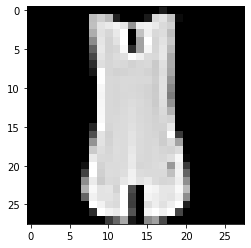

In [ ]:
plt.imshow(x_train[4])

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
x_train = (x_train / 255 - 0.5) * 2
x_test = (x_test / 255 - 0.5) * 2

In [ ]:
x_train.max()

1.0

In [ ]:
x_train.min()

-1.0

In [ ]:
# AUTOENCODER EN 60s

In [ ]:
from keras.layers import Dense, Flatten, Reshape
from keras.models import Sequential

In [ ]:
z_dim = 10
h_dim = 100

encoder = Sequential([
                      Flatten(input_shape=(28,28)),
                      Dense(h_dim, "relu"),
                      Dense(h_dim / 2, "relu"),
                      Dense(z_dim),
])

decoder = Sequential([
                      Dense(h_dim / 2, "relu", input_shape=(z_dim,)),
                      Dense(h_dim, "relu"),
                      Dense(28*28, "tanh"),
                      Reshape((28,28))
])

autoencoder = Sequential([encoder, decoder])

In [ ]:
encoder.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_34 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder.predict(x_train[2:3])

array([[-1.0546746 , -0.04072259,  0.18366167, -0.14850932, -0.23464563,
        -0.81793976, -0.6747857 ,  0.5593476 ,  0.51084983, -1.3188546 ]],
      dtype=float32)

In [ ]:
autoencoder.predict(x_train[4:5])

array([[[ 2.50273719e-02,  5.94512522e-02, -1.09903157e-01,
          1.19071249e-02, -7.33720139e-02,  4.52715605e-02,
          4.58633192e-02, -2.50708889e-02,  6.63020685e-02,
         -2.21906044e-02, -6.80448161e-03,  8.88171792e-02,
          2.35625301e-02, -3.25805061e-02,  4.42941720e-03,
          7.87463039e-03, -6.35047033e-02, -3.77760679e-02,
          6.03474416e-02, -3.78072225e-02,  1.65619105e-02,
         -2.59915031e-02,  4.93536368e-02, -2.53680833e-02,
          1.17845982e-02,  2.98316889e-02, -6.49651885e-02,
          1.58781543e-01],
        [-3.72539386e-02,  6.57486077e-03,  8.04120526e-02,
         -1.81460171e-03,  1.02254599e-01, -3.48914526e-02,
         -9.02955681e-02,  9.58337076e-03, -2.17127297e-02,
         -5.37252016e-02, -6.04549460e-02, -5.26076462e-03,
         -2.44859233e-02,  3.61115932e-02, -6.56157658e-02,
         -3.68259661e-02,  4.65136059e-02,  4.22639586e-02,
          1.66587792e-02, -8.01960099e-03,  8.52298141e-02,
         -5.9

In [ ]:
autoencoder.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_16 (Sequential)   (None, 10)                84060     
_________________________________________________________________
sequential_17 (Sequential)   (None, 28, 28)            84834     
Total params: 168,894
Trainable params: 168,894
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam

autoencoder.compile(Adam(), loss="mse")

In [ ]:
autoencoder.fit(x_train, x_train, batch_size=512, epochs=40, validation_data=(x_test, x_test))

Epoch 1/40
118/118 [==============================] - 2s 7ms/step - loss: 0.3446 - val_loss: 0.1115
Epoch 2/40
118/118 [==============================] - 1s 5ms/step - loss: 0.1031 - val_loss: 0.0891
Epoch 3/40
118/118 [==============================] - 1s 5ms/step - loss: 0.0860 - val_loss: 0.0801
Epoch 4/40
118/118 [==============================] - 1s 5ms/step - loss: 0.0788 - val_loss: 0.0758
Epoch 5/40
118/118 [==============================] - 1s 4ms/step - loss: 0.0749 - val_loss: 0.0729
Epoch 6/40
118/118 [==============================] - 1s 5ms/step - loss: 0.0715 - val_loss: 0.0710
Epoch 7/40
118/118 [==============================] - 1s 4ms/step - loss: 0.0698 - val_loss: 0.0689
Epoch 8/40
118/118 [==============================] - 1s 4ms/step - loss: 0.0682 - val_loss: 0.0677
Epoch 9/40
118/118 [==============================] - 1s 5ms/step - loss: 0.0667 - val_loss: 0.0669
Epoch 10/40
118/118 [==============================] - 1s 4ms/step - loss: 0.0657 - val_loss: 0.0658

In [ ]:
history = _

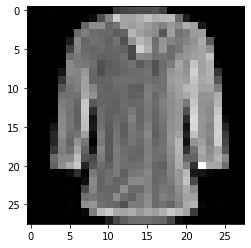

In [ ]:
plt.imshow(x_test[4])

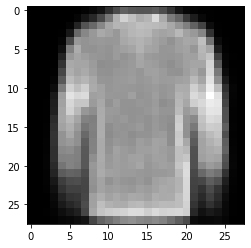

In [ ]:
plt.imshow( autoencoder.predict(x_test[4:5])[0] )

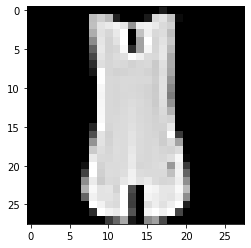

In [ ]:
plt.imshow(x_train[4])

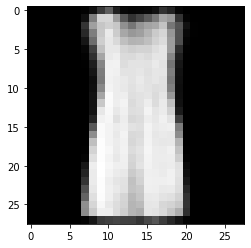

In [ ]:
plt.imshow( autoencoder.predict(x_train[4:5])[0] )

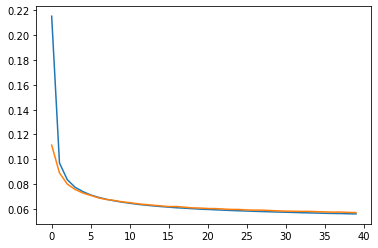

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

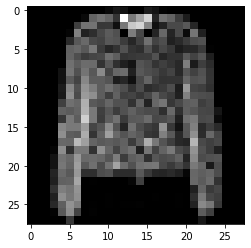

In [ ]:
plt.imshow(x_test[51])

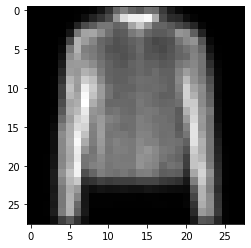

In [ ]:
plt.imshow( autoencoder.predict(x_test[51:52])[0] )

In [ ]:
# VAE

tiene de diferente
1. capa de sampling (muestreo).
2. ver como lidiamos con la KL.
3. encoder con varias salidas y tal

In [ ]:
# encoder

encoder_head = Sequential([
                           Flatten(input_shape=(28,28)),
                           Dense(h_dim, "relu"),
])

In [ ]:
from keras.layers import Input
from keras.models import Model

In [ ]:
inp = Input(shape=(28,28))
h = encoder_head(inp)

mu = Dense(z_dim)(h)
log_std = Dense(z_dim)(h)

In [ ]:
encoder_mean = Model(inp, mu)   # va a ser útil para reducir dimensionalidad, no lo usaremos para entrenar.

In [ ]:
encoder_mean.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
sequential_20 (Sequential)   (None, 100)               78500     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-cp37-none-any.whl size=2657 sha256=2ec6af3a70fa02a1363c55eae55bc1c75854ddbdbeb508062ba1c5b158b762de
  Stored in directory: /root/.cache/pip/wheels/46/25/27/7707005c1cb27e1ffc8277b004ac295e34767b02b44d73d6be
Successfully built keras.utils


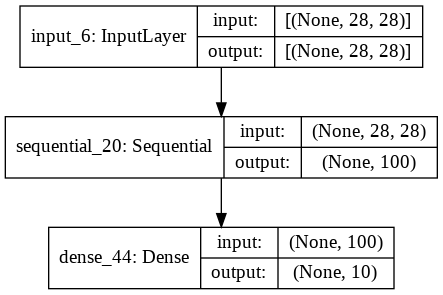

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(encoder_mean, show_shapes=True, show_layer_names=True)

In [ ]:
# capas custom

In [ ]:
# paréntesis
f = lambda x: x**2
f(4)

16

In [ ]:
from keras.layers import Lambda
# capas lambda

inppp = Input(shape=(1,))
outtt = Lambda(lambda x: x**2)(inppp)

In [ ]:
square_model = Model(inppp, outtt)
square_model.predict([2.,3.,4.])

array([[ 4.],
       [ 9.],
       [16.]], dtype=float32)

In [ ]:
square_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
lambda (Lambda)              (None, 1)                 0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fin paréntesis. capa de sampling.
import tensorflow as tf

def sample(inputs):
  mu, log_std = inputs
  epsilon = tf.random.normal(shape=(tf.shape(mu)[0], tf.shape(mu)[1]))
  return epsilon * tf.exp(log_std) + mu

Sampling = Lambda(sample)

In [ ]:
# testear la capa
muuu1 = Input(shape=(1,))
logstdd1 = Input(shape=(1,))
outtt = Sampling([muuu1, logstdd1])
sampler = Model([muuu1, logstdd1], outtt)

In [ ]:
sampler.predict([np.array([-10.]), np.array([8.])])

array([[715.0293]], dtype=float32)

In [ ]:
# KL y capas custom

In [ ]:
from keras.layers import Layer

In [ ]:
class KL(Layer):
  def __init__(self, kl_weight=1):
    super(KL, self).__init__()
    self.kl_weight = kl_weight

  def call(self, inputs):
    mu, log_std = inputs
    kl = -0.5 * self.kl_weight * tf.reduce_sum(1. + 2. * log_std - tf.square(mu) - tf.exp(2. * log_std), axis=-1)
    self.add_loss(tf.reduce_mean(kl))
    return [mu, log_std]


In [ ]:
muuu1 = Input(shape=(1,))
logstdd1 = Input(shape=(1,))
outtt = KL()([muuu1, logstdd1])

klmodell = Model([muuu1, logstdd1], outtt)

In [ ]:
klmodell.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_21 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
kl_1 (KL)                       [(None, 1), (None, 1 0           input_20[0][0]                   
                                                                 input_21[0][0]                   
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


In [ ]:
klmodell.predict([np.array([1.]), np.array([1.])])

[array([[1.]], dtype=float32), array([[1.]], dtype=float32)]

In [ ]:
klmodell.compile(optimizer="adam", loss=None)

In [ ]:
klmodell.test_on_batch([np.array([0.]), np.array([9.])])

32829976.0

In [ ]:
# montar nuestro autoencoder

In [ ]:
decoder = Sequential([
                      Dense(h_dim, "relu", input_shape=(z_dim,)),
                      Dense(28*28, "tanh"),
                      Reshape((28,28)),
])

In [ ]:
# encoder

encoder_head = Sequential([
                           Flatten(input_shape=(28,28)),
                           Dense(h_dim, "relu"),
])

In [ ]:
from keras.layers import Input
from keras.models import Model

In [ ]:
inp = Input(shape=(28,28))
h = encoder_head(inp)

mu = Dense(z_dim)(h)
log_std = Dense(z_dim)(h)

In [ ]:
# aplicamos kl
mu1, log_std1 = KL()([mu, log_std])

# aplicamos sampling
z = Lambda(sample)([mu1, log_std1]) # también Sample([..])

out = decoder(z)


In [ ]:
vae = Model(inp, out)

In [ ]:
vae.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
sequential_25 (Sequential)      (None, 100)          78500       input_24[0][0]                   
__________________________________________________________________________________________________
dense_57 (Dense)                (None, 10)           1010        sequential_25[0][0]              
__________________________________________________________________________________________________
dense_58 (Dense)                (None, 10)           1010        sequential_25[0][0]              
___________________________________________________________________________________________

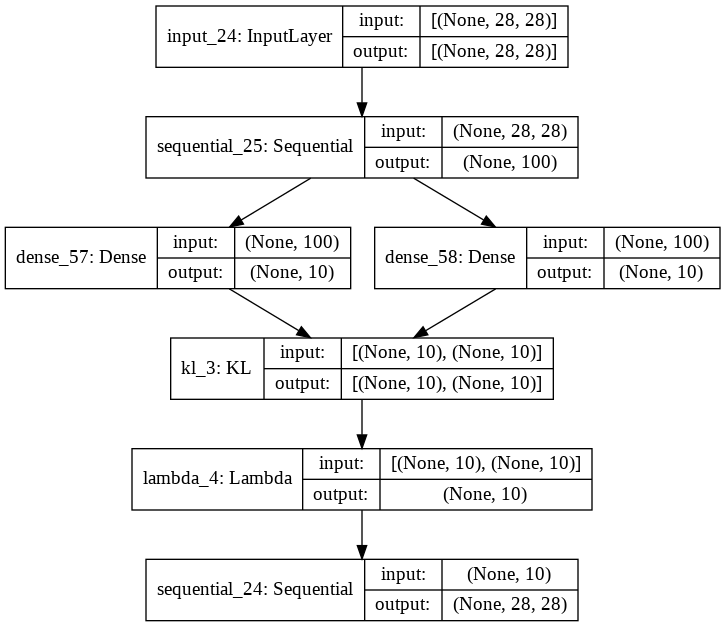

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(vae, show_shapes=True, show_layer_names=True)

In [ ]:
encoder_mean = Model(inp, mu) # útil para codificar pero no se usa en el entrenamiento

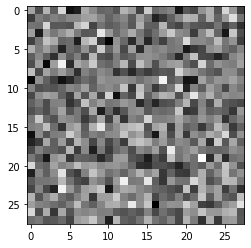

In [ ]:
plt.imshow( vae.predict(x_train[2:3])[0] )

In [ ]:
# compilamos y entrenamos
from keras.losses import mse

vae.compile("adam", loss = lambda x, y: 28 * 28 * mse(x,y)) # corregimos para que el error de reconstrucción sea de la imagen y no de pixel. (512, 28, 28) hace la media en las otras dos también.

In [ ]:
history = vae.fit(x_train, x_train, batch_size=512, epochs=80, validation_data=(x_test, x_test))

Epoch 1/80
118/118 [==============================] - 2s 8ms/step - loss: 319.1763 - val_loss: 122.1595
Epoch 2/80
118/118 [==============================] - 1s 5ms/step - loss: 114.1393 - val_loss: 99.7874
Epoch 3/80
118/118 [==============================] - 1s 5ms/step - loss: 97.1977 - val_loss: 91.2365
Epoch 4/80
118/118 [==============================] - 1s 5ms/step - loss: 89.7429 - val_loss: 86.6970
Epoch 5/80
118/118 [==============================] - 1s 5ms/step - loss: 85.5829 - val_loss: 83.7479
Epoch 6/80
118/118 [==============================] - 1s 5ms/step - loss: 83.0869 - val_loss: 81.6070
Epoch 7/80
118/118 [==============================] - 1s 5ms/step - loss: 80.9508 - val_loss: 79.8369
Epoch 8/80
118/118 [==============================] - 1s 5ms/step - loss: 79.5933 - val_loss: 78.5788
Epoch 9/80
118/118 [==============================] - 1s 5ms/step - loss: 78.2555 - val_loss: 77.6956
Epoch 10/80
118/118 [==============================] - 1s 5ms/step - loss: 76.8

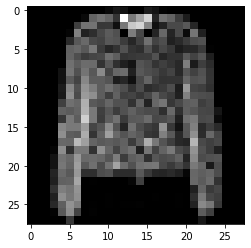

In [ ]:
plt.imshow(x_test[51])

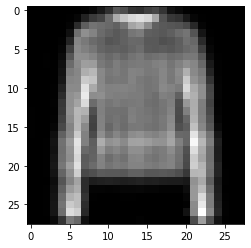

In [ ]:
plt.imshow( vae.predict(x_test[51:52])[0] )

In [ ]:
# generar datos

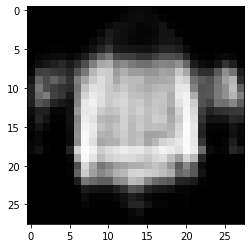

In [ ]:
z_test = np.random.randn(1, z_dim)
x_gen = decoder.predict(z_test)
plt.imshow(x_gen[0])

In [ ]:
z_test

array([[-0.00980701,  1.02623218, -1.67309723,  0.48400255,  0.55499728,
        -1.40484144,  1.57099628,  0.7569925 ,  0.18235008, -0.26921682]])

In [ ]:
# vae de 2 dimensiones

In [ ]:
z_dim = 2
h_dim = 100

In [ ]:
# montar nuestro autoencoder

In [ ]:
decoder2 = Sequential([
                      Dense(h_dim, "relu", input_shape=(z_dim,)),
                      Dense(28*28, "tanh"),
                      Reshape((28,28)),
])

In [ ]:
# encoder

encoder_head2 = Sequential([
                           Flatten(input_shape=(28,28)),
                           Dense(h_dim, "relu"),
])

In [ ]:
from keras.layers import Input
from keras.models import Model

In [ ]:
inp2 = Input(shape=(28,28))
h2 = encoder_head2(inp2)

mu2 = Dense(z_dim)(h2)
log_std2 = Dense(z_dim)(h2)

In [ ]:
# aplicamos kl
mu12, log_std12 = KL()([mu2, log_std2])

# aplicamos sampling
z2 = Lambda(sample)([mu12, log_std12]) # también Sample([..])

out2 = decoder2(z2)


In [ ]:
vae2 = Model(inp2, out2)

In [ ]:
vae2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 100)          78500       input_5[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 2)            202         sequential_1[0][0]               
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 2)            202         sequential_1[0][0]               
____________________________________________________________________________________________

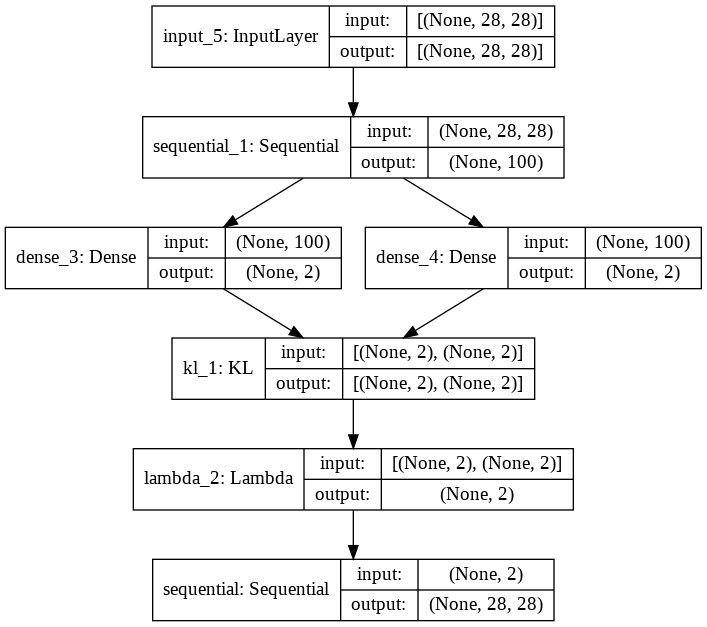

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(vae2, show_shapes=True, show_layer_names=True)

In [ ]:
encoder_mean2 = Model(inp2, mu2) # útil para codificar pero no se usa en el entrenamiento

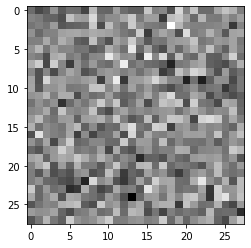

In [ ]:
plt.imshow( vae2.predict(x_train[2:3])[0] )

In [ ]:
# compilamos y entrenamos
from keras.losses import mse

vae2.compile("adam", loss = lambda x, y: 28 * 28 * mse(x,y)) # corregimos para que el error de reconstrucción sea de la imagen y no de pixel. (512, 28, 28) hace la media en las otras dos también.

In [ ]:
history = vae2.fit(x_train, x_train, batch_size=512, epochs=80, validation_data=(x_test, x_test))

Epoch 1/80
118/118 [==============================] - 7s 9ms/step - loss: 305.8335 - val_loss: 143.3015
Epoch 2/80
118/118 [==============================] - 1s 5ms/step - loss: 139.5712 - val_loss: 131.2597
Epoch 3/80
118/118 [==============================] - 1s 5ms/step - loss: 129.2668 - val_loss: 124.4549
Epoch 4/80
118/118 [==============================] - 1s 5ms/step - loss: 123.8653 - val_loss: 120.6922
Epoch 5/80
118/118 [==============================] - 1s 5ms/step - loss: 120.8517 - val_loss: 118.1968
Epoch 6/80
118/118 [==============================] - 1s 5ms/step - loss: 118.3395 - val_loss: 116.1850
Epoch 7/80
118/118 [==============================] - 1s 5ms/step - loss: 116.4416 - val_loss: 114.4773
Epoch 8/80
118/118 [==============================] - 1s 5ms/step - loss: 114.5089 - val_loss: 112.9354
Epoch 9/80
118/118 [==============================] - 1s 5ms/step - loss: 113.0751 - val_loss: 111.7393
Epoch 10/80
118/118 [==============================] - 1s 5ms/st

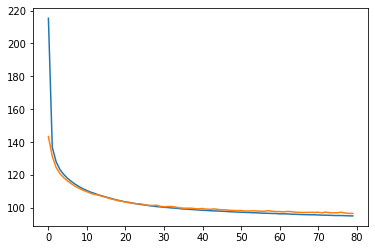

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

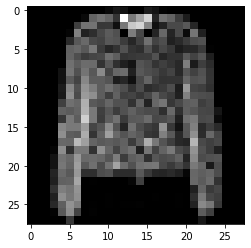

In [ ]:
plt.imshow(x_test[51])

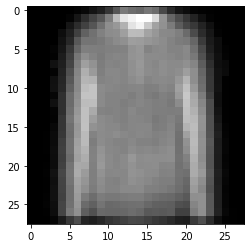

In [ ]:
plt.imshow( vae2.predict(x_test[51:52])[0] )

In [ ]:
# generar datos

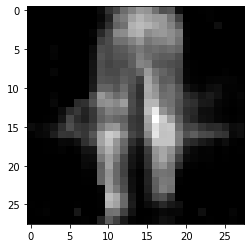

In [ ]:
z_test = np.random.randn(1, z_dim)
x_gen = decoder2.predict(z_test)
plt.imshow(x_gen[0])

In [ ]:
# ver el espacio latente

In [ ]:
z_pred = encoder_mean2.predict(x_test)

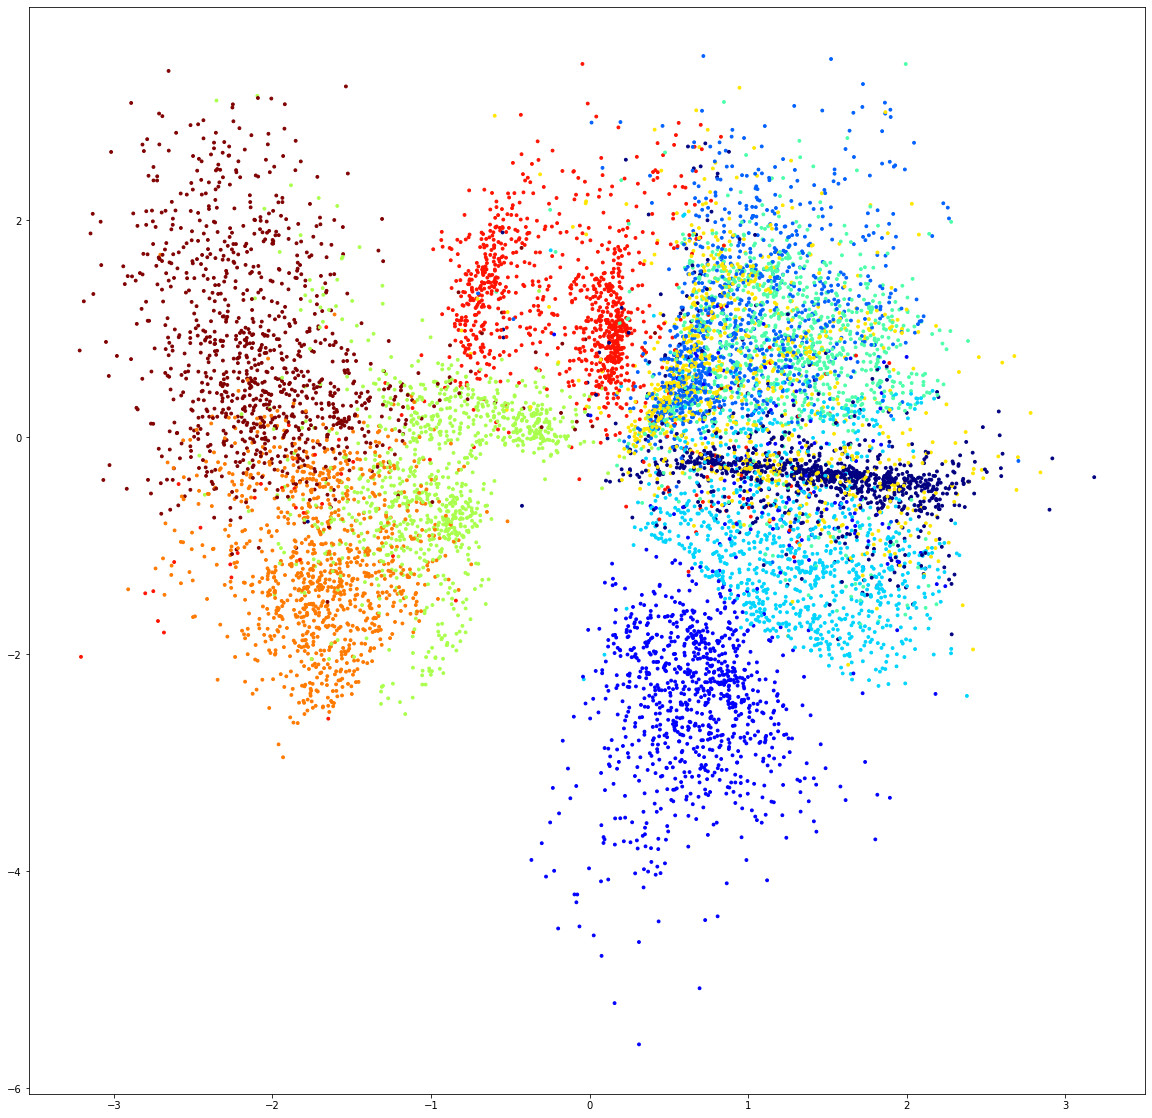

In [ ]:
plt.figure(figsize=(20, 20))
plt.scatter(z_pred[:, 0], z_pred[:, 1], s=8, c=y_test, cmap="jet")

In [ ]:
x_grid = np.linspace(-3., 3., 10)
y_grid = np.linspace(-3., 3., 10)
image_zs = np.zeros([28*10, 28*10])

for i, x in enumerate(x_grid):
  for j, y in enumerate(y_grid):
    pred = decoder2.predict([[x, y]])
    image_zs[i*28:(i+1)*28, j*28:(j+1)*28] = pred[0]


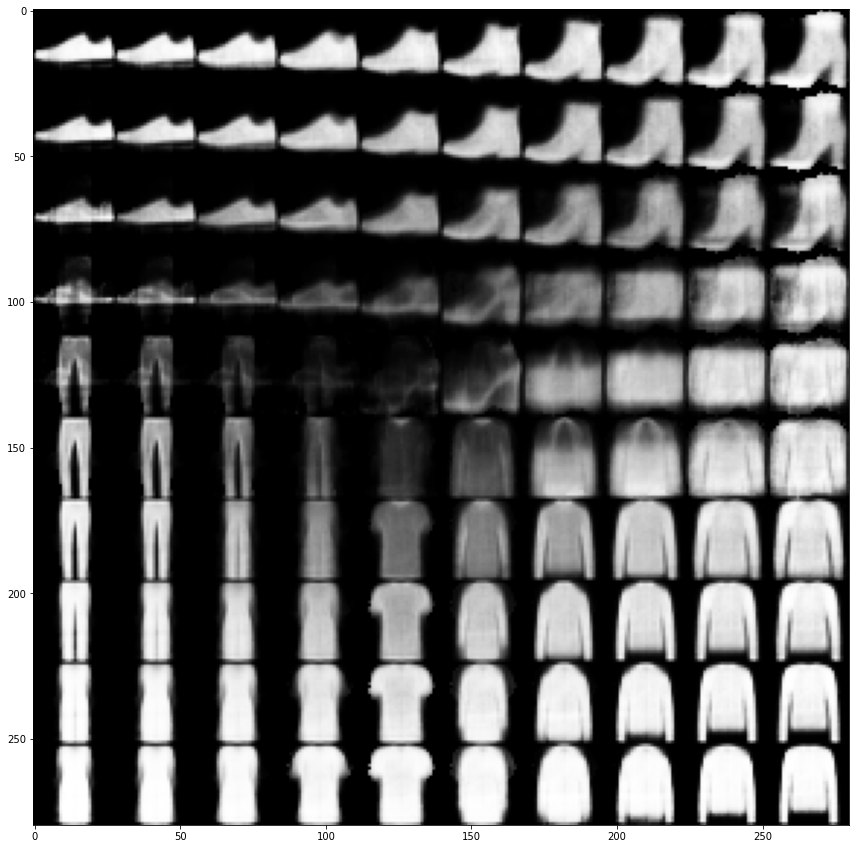

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(image_zs)